In [19]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

# Path to the dataset
data_dir = 'C:/prodigy/proj 4/leapGestRecog'

# Parameters
img_height, img_width = 128, 128
batch_size = 32

# List of class names based on the folder names
class_names = sorted(os.listdir(data_dir))
num_classes = len(class_names)

# Function to load images and labels
def load_data(data_dir, img_height, img_width):
    images = []
    labels = []
    for label, class_name in enumerate(class_names):
        class_dir = os.path.join(data_dir, class_name)
        for img_name in os.listdir(class_dir):
            img_path = os.path.join(class_dir, img_name)
            img = tf.keras.preprocessing.image.load_img(img_path, target_size=(img_height, img_width))
            img = tf.keras.preprocessing.image.img_to_array(img)
            images.append(img)
            labels.append(label)
    images = np.array(images)
    labels = np.array(labels)
    return images, labels

# Load the data
images, labels = load_data(data_dir, img_height, img_width)

# Normalize the images
images = images / 255.0

# Convert labels to one-hot encoding
labels = to_categorical(labels, num_classes)

# Split the data
train_images, test_images, train_labels, test_labels = train_test_split(images, labels, test_size=0.2, random_state=42)
train_images, val_images, train_labels, val_labels = train_test_split(train_images, train_labels, test_size=0.2, random_state=42)

# Data augmentation
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

datagen.fit(train_images)



In [20]:
def create_cnn_model(input_shape, num_classes):
    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(num_classes, activation='softmax')
    ])
    return model


In [21]:
input_shape = (img_height, img_width, 3)
model = create_cnn_model(input_shape, num_classes)

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(datagen.flow(train_images, train_labels, batch_size=batch_size),
                    steps_per_epoch=len(train_images) // batch_size,
                    epochs=20,
                    validation_data=(val_images, val_labels))


c:\Users\Muskaan\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20


c:\Users\Muskaan\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


40/40 ━━━━━━━━━━━━━━━━━━━━ 15s 278ms/step - accuracy: 0.1319 - loss: 2.2852 - val_accuracy: 0.3313 - val_loss: 1.9195
Epoch 2/20


c:\Users\Muskaan\AppData\Local\Programs\Python\Python312\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.3313 - val_loss: 1.9195
Epoch 3/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 12s 277ms/step - accuracy: 0.2991 - loss: 1.9595 - val_accuracy: 0.6625 - val_loss: 0.9914
Epoch 4/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.6625 - val_loss: 0.9914
Epoch 5/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 12s 275ms/step - accuracy: 0.5630 - loss: 1.2836 - val_accuracy: 0.7063 - val_loss: 0.6339
Epoch 6/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.7063 - val_loss: 0.6339
Epoch 7/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 13s 290ms/step - accuracy: 0.7540 - loss: 0.7223 - val_accuracy: 0.9344 - val_loss: 0.3336
Epoch 8/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.9344 - val_loss: 0.3336
Epoch 9/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 12s 278ms/step - accuracy: 0.8403 - loss: 0.47

In [22]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f'\nTest accuracy: {test_acc}')


13/13 - 1s - 72ms/step - accuracy: 1.0000 - loss: 0.0193

Test accuracy: 1.0


In [23]:
model.save('hand_gesture_recognition_model.h5')


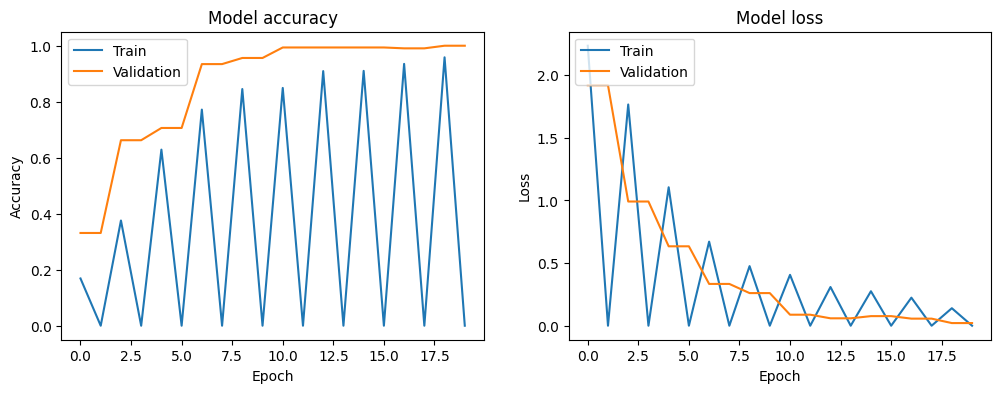

In [24]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()


In [25]:
from sklearn.metrics import classification_report

# Predict on test data
y_pred = model.predict(test_images)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(test_labels, axis=1)

# Print classification report
print(classification_report(y_true_classes, y_pred_classes, target_names=class_names))


13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step
               precision    recall  f1-score   support

      01_palm       1.00      1.00      1.00        36
         02_l       1.00      1.00      1.00        47
      03_fist       1.00      1.00      1.00        46
04_fist_moved       1.00      1.00      1.00        36
     05_thumb       1.00      1.00      1.00        34
     06_index       1.00      1.00      1.00        34
        07_ok       1.00      1.00      1.00        33
08_palm_moved       1.00      1.00      1.00        44
         09_c       1.00      1.00      1.00        48
      10_down       1.00      1.00      1.00        42

     accuracy                           1.00       400
    macro avg       1.00      1.00      1.00       400
 weighted avg       1.00      1.00      1.00       400



In [26]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


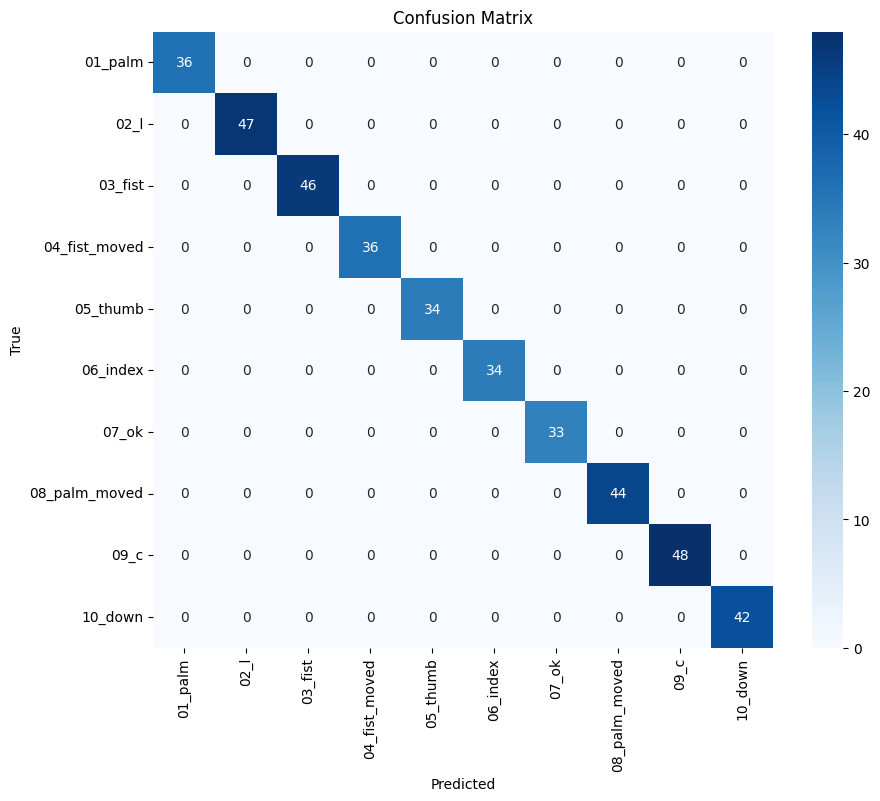

In [27]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Generate confusion matrix
conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


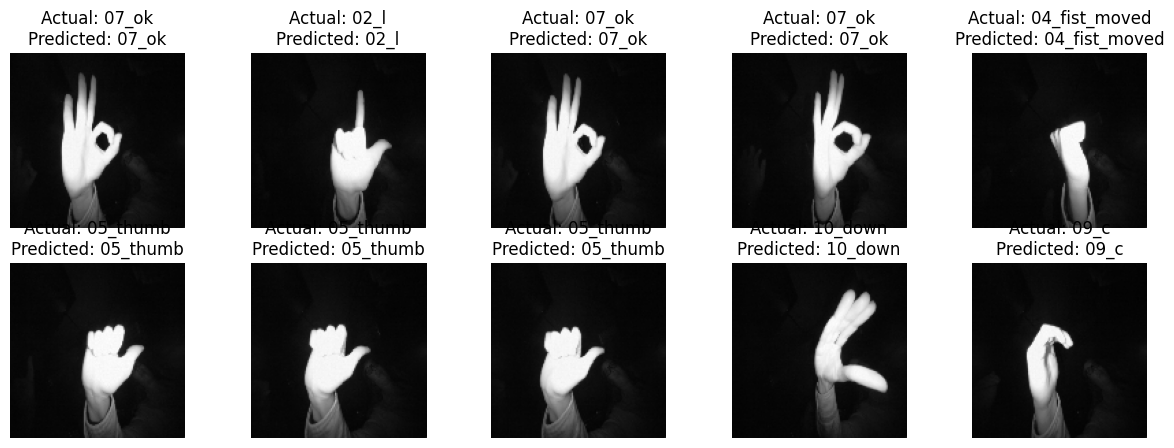

In [28]:
import random

num_display = 10  # Number of images to display
indices = random.sample(range(len(test_images)), num_display)

plt.figure(figsize=(15, 5))
for i, idx in enumerate(indices):
    plt.subplot(2, 5, i + 1)
    plt.imshow(test_images[idx])
    plt.title(f"Actual: {class_names[y_true_classes[idx]]}\nPredicted: {class_names[y_pred_classes[idx]]}")
    plt.axis('off')

plt.show()


In [29]:
import cv2

# Load the trained model
model = tf.keras.models.load_model('hand_gesture_recognition_model.h5')

# Function to preprocess frame
def preprocess_frame(frame, img_height, img_width):
    frame = cv2.resize(frame, (img_height, img_width))
    frame = frame.astype('float32') / 255.0
    frame = np.expand_dims(frame, axis=0)
    return frame

# Open video capture
cap = cv2.VideoCapture(0)  # Use 0 for the default camera

while True:
    ret, frame = cap.read()
    if not ret:
        break

    # Preprocess frame
    processed_frame = preprocess_frame(frame, img_height, img_width)

    # Predict gesture
    prediction = model.predict(processed_frame)
    predicted_class = np.argmax(prediction, axis=1)[0]
    predicted_label = class_names[predicted_class]

    # Display the prediction on the frame
    cv2.putText(frame, f'Prediction: {predicted_label}', (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2, cv2.LINE_AA)

    # Show the frame
    cv2.imshow('Hand Gesture Recognition', frame)

    # Break the loop on 'q' key press
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the capture and close windows
cap.release()
cv2.destroyAllWindows()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━

In [30]:
import os
import cv2
import numpy as np
import tensorflow as tf

# Load the trained model
model_path = 'hand_gesture_recognition_model.h5'
model = tf.keras.models.load_model(model_path)

# Class names based on the folder names in your dataset
data_dir = 'C:/prodigy/proj 4/leapGestRecog'
class_names = sorted(os.listdir(data_dir))
print("Class Names:", class_names)  # Debugging

# Parameters
img_height, img_width = 128, 128

# Function to preprocess frame
def preprocess_frame(frame, img_height, img_width):
    frame = cv2.resize(frame, (img_height, img_width))
    frame = frame.astype('float32') / 255.0
    frame = np.expand_dims(frame, axis=0)
    return frame

# Open video capture
cap = cv2.VideoCapture(0)  # Use 0 for the default camera

while True:
    ret, frame = cap.read()
    if not ret:
        break

    # Preprocess frame
    processed_frame = preprocess_frame(frame, img_height, img_width)

    # Predict gesture
    prediction = model.predict(processed_frame)
    predicted_class = np.argmax(prediction, axis=1)[0]
    predicted_label = class_names[predicted_class]

    # Debugging: Print the prediction
    print("Prediction:", prediction)
    print("Predicted Class:", predicted_class)
    print("Predicted Label:", predicted_label)

    # Display the prediction on the frame
    cv2.putText(frame, f'Prediction: {predicted_label}', (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2, cv2.LINE_AA)

    # Show the frame
    cv2.imshow('Hand Gesture Recognition', frame)

    # Break the loop on 'q' key press
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the capture and close windows
cap.release()
cv2.destroyAllWindows()


Class Names: ['01_palm', '02_l', '03_fist', '04_fist_moved', '05_thumb', '06_index', '07_ok', '08_palm_moved', '09_c', '10_down']
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
Prediction: [[8.9411170e-17 5.7387691e-08 2.4996176e-21 6.9951013e-20 8.6622407e-14
  7.5948837e-11 9.8107648e-01 2.9309865e-16 1.8231384e-13 1.8923461e-02]]
Predicted Class: 6
Predicted Label: 07_ok
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Prediction: [[7.3380706e-18 1.9009440e-07 8.1393295e-22 1.3657269e-19 5.3570592e-14
  3.9629432e-11 9.3261570e-01 7.7470973e-16 1.6274303e-12 6.7384072e-02]]
Predicted Class: 6
Predicted Label: 07_ok
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Prediction: [[1.8661024e-19 1.6260414e-07 4.0305084e-23 4.1919672e-20 7.7007924e-15
  1.0820196e-11 7.3405498e-01 1.3433883e-15 6.9134043e-12 2.6594484e-01]]
Predicted Class: 6
Predicted Label: 07_ok
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
Prediction: [[1.4303133e-19 1.6787990e-07 3.1297873e-23 3.2345912e-20 6.9804409e-15
  1.1284324e-11 7.7177721e-01 1.1